# K Nearest Neighbors Modeling

## Objectives
* Load data
* Tune hyper parameters for each version of the data
* Select a model
* Examine results
* Save results

## Tools Used
* Pickle
* Numpy
* Pandas
* Matplotlib
* Sklearn
* Imblearn

#### Load data

I will start by importing the necessary libraries.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_recall_curve, auc, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit
import time
from modeling_functions import *

import warnings
warnings.filterwarnings("ignore") 

Using TensorFlow backend.


## Pickle

In [2]:
# Load data
pickle_in = open("engineered_data.pickle", "rb")
df = pickle.load(pickle_in)
pickle_in.close()

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df)


# combine train, val and test data
X = pd.concat([X_train, X_val, X_test], axis=0)
y = pd.concat([y_train, y_val, y_test], axis=0)


(14275, 53) (42721, 53) (42722, 53) (14275,) (42721,) (42722,)


In [3]:
# Load data
pickle_in = open("olr_keys_n_components.pickle", "rb")
olr_keys_n_components = list(pickle.load(pickle_in))
pickle_in.close()

# Sanity Check
print(olr_keys_n_components)

[('s1_r1_o1', 19), ('s1_r1_o3', 18), ('s1_r2_o1', 17), ('s1_r2_o3', 16), ('s2_r1_o1', 26), ('s2_r1_o3', 26), ('s2_r2_o1', 21), ('s2_r2_o3', 22), ('s3_r1_o1', 23), ('s3_r1_o3', 25), ('s3_r2_o1', 17), ('s3_r2_o3', 20)]


## Tune hyperparameters

My goal for this project is to create a model that can help alert a credit lender to suspicious activity. <br><br>

For this reason I want to have low false negatives, so I will be using recall as my main metric. High recall will mean a low amount of fradulent transactions are left undetected. <br><br>

My second metric will be precision because I do not want false positives either. low precision would cause the model to flag too large an amount of the data as likely to be fraudulent. If the credit lender chose to take preventative action on say, every other transaction, then that would be a nuisance to both the credit lender and the clients. <br><br>

However precision does not need to be nearly as high as recall. If recall was say %80 then I would have potentially stopped %80 percent of fraud and if precision was say %20 then less than 1 out of 100 transactions would be flagged as suspicous to fraud, because in this dataset fraud accounts for %0.17 percent of the data I was  given. <br><br> 

F1-score is the harmonic mean of recall and precision. It is not the best metric to use though because it is important that recall is high, but precision can get away with being much lower.<br><br>

The metrics mentioned above are calculated by comparing the known values to the model's predicted values. The simplified formulas for precision and recall are showed below. 
<img src="../Images/Precision_Recall.png"><br>
<a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">Image Source</a> 
<br><br>

To tune the hyperparameters I will use my own function called customGridSearch. It has a doc string attached. The function will go through the data transforming it according to the function's parameters and return the cross validation scores for each method as well as for the best combination of parameters.

## KNeighborsClassifier

In [4]:
# Instantiate classifer
clf = KNeighborsClassifier()

# Create parameter grid
params = {
    "n_neighbors": list(range(25, 36, 10)), 
    'algorithm': ['auto', 'ball_tree']
}

Warning the following cell 5 took minutes to run!

In [5]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# No outliers removed
# No PCA

t1 = time.time()

# Record results
results_o1 = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler in enumerate([MinMaxScaler(), StandardScaler(), RobustScaler()]):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o1[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE())
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'ball_tree', 'n_neighbors': 25} 
 recall: 0.8430946291560103 
 precision: 0.37757578178663403 
 f1-score: 0.5177554416728618 
precision-recall auc: 0.8261578234524828 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'ball_tree', 'n_neighbors': 25} 
 recall: 0.8633844842284739 
 precision: 0.3642516195305946 
 f1-score: 0.5118700523303662 
precision-recall auc: 0.8313513259740773 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 25} 
 recall: 0.9128729752770675 
 precision: 0.2973412054511816 
 f1-score: 0.4482247577601276 
precision-recall auc: 0.846286907113616 

19.162040015061695


Warning: The following cell took 4 minutes to run!

In [6]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# outliers removed
# No PCA

t1 = time.time()

# Record results
results_o3 = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler in enumerate([MinMaxScaler(), StandardScaler(), RobustScaler()]):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o3[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE(), outlier_removal=True)
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 35} 
 recall: 0.8924552429667519 
 precision: 0.1038247706633045 
 f1-score: 0.18555397027276938 
precision-recall auc: 0.4760787911192157 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'ball_tree', 'n_neighbors': 35} 
 recall: 0.938917306052856 
 precision: 0.05630595559122518 
 f1-score: 0.1062115590013494 
precision-recall auc: 0.5488242800391996 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 25} 
 recall: 0.9650895140664962 
 precision: 0.10004059898612641 
 f1-score: 0.18095559622339713 
precision-recall auc: 0.7218193004024609 

3.152652355035146


Warning: The following cell took 8 minutes to run!

In [7]:
# Tune hyperparameters for all scalers 
# Implementing NearMiss
# No outliers removed
# PCA

t1 = time.time()


# Get correct scaler_str's and n_components (for PCA)
o1_n_components = []
for key, n in olr_keys_n_components:
    if 'r1_o1' in key:
        o1_n_components.append(n)
        

# Record results
results_o1_p = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler, k in zip([0,1,2],[MinMaxScaler(), StandardScaler(), RobustScaler()], o1_n_components):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o1_p[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, 'f1', scaler, SMOTE(), pca=PCA(k))
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 35} 
 recall: 0.8257459505541348 
 precision: 0.44656237028630275 
 f1-score: 0.5755536209815293 
precision-recall auc: 0.8306336044208805 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 35} 
 recall: 0.8546462063086103 
 precision: 0.39270921468745434 
 f1-score: 0.5370267579126967 
precision-recall auc: 0.8522976829068367 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 25} 
 recall: 0.9041346973572038 
 precision: 0.3255032535910174 
 f1-score: 0.4779703038520909 
precision-recall auc: 0.8564463821922758 

4.984287854035696


Warning: this cell took 8 minutes to run!

In [8]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# Outliers removed
# PCA

t1 = time.time()


# Get correct scaler_str's and n_components (for PCA)
o3_n_components = []
for key, n in olr_keys_n_components:
    if 'r1_o3' in key:
        o3_n_components.append(n)
        

# Record results
results_o3_p = {}
for n, scaler, k in zip([0,1,2],[MinMaxScaler(), StandardScaler(), RobustScaler()], o3_n_components):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o3_p[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE(), 
                                                     outlier_removal=True, pca=PCA(k))
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 25} 
 recall: 0.8663256606990621 
 precision: 0.18692488587546166 
 f1-score: 0.30436013613639196 
precision-recall auc: 0.6500592175463112 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'ball_tree', 'n_neighbors': 25} 
 recall: 0.9505115089514067 
 precision: 0.0935328786058859 
 f1-score: 0.17017763944546263 
precision-recall auc: 0.694975326001256 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'algorithm': 'auto', 'n_neighbors': 25} 
 recall: 0.9621909633418586 
 precision: 0.10092307532716767 
 f1-score: 0.18251221747801777 
precision-recall auc: 0.7145201731906076 

1.3718947052955628


# Model selection

Now I will look through each models scores manually and conclude which one is the best performing model.

My choice a model using the data scaled with MinMaxScaler, without the outliers removed and with PCA because it had a high cross validated recall of ~%88 and precision of ~%47
The models parameters are as follows: <br> <br>
{'algorithm': 'auto', 'n_neighbors': 35}  

In [19]:
model = KNeighborsClassifier(algorithm="auto", n_neighbors=35)

In [20]:
for i in olr_keys_n_components:
    if "s1_r1_o1" in i[0]:
        print(i[1])

19


In [21]:
def engineer(X_train, X_test, y_train, y_test):
    # scaling
    rs = MinMaxScaler()
    X_train = rs.fit_transform(X_train)
    X_test = rs.transform(X_test)
    
    # pca
    pca = PCA(19)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # resampling
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

# Choosing the right threshold

In [22]:
X_train_, X_val_, y_train_, y_val_ = engineer(X_train, X_val, y_train, y_val)

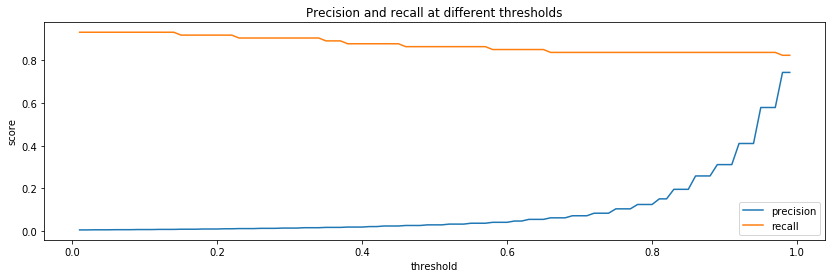

In [23]:
model.fit(X_train_, y_train_)
probs = model.predict_proba(X_val_)[:,1]

thresholds = np.array(range(1, 100))/100
precisions = []
recalls = []

for threshold in thresholds:
    result = [0 if prob < threshold else 1 for prob in probs]
    precisions.append(precision_score(y_val, result))
    recalls.append(recall_score(y_val, result))

plt.figure(figsize=(14, 4))
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.title("Precision and recall at different thresholds")
plt.xlabel("threshold")
plt.ylabel("score")
plt.legend()
plt.show()

    

It seems the best the best threshold is around 0.97

In [24]:
threshold = 0.97

## Goodness of fit: How much data to train on

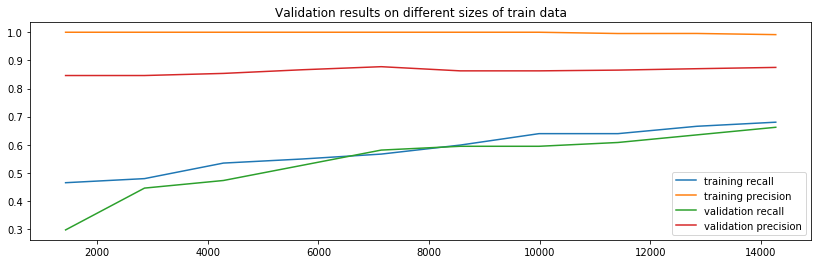

In [25]:
size_plot(model, X_train, X_val, y_train, y_val, StandardScaler(), pca=PCA(26), threshold=threshold)

In this scenario I think all the data should be used as the scores increase.

## Holdout Validation
Now I will run the model on the test data which has yet to be seen by the model.

In [26]:
# run data on test set

# engineer data
X_train_, X_test_, y_train_, y_test_ = engineer(X_train, X_test, y_train, y_test)

# fit model to entire train set
model.fit(X_train_, y_train_)

# run model on test set
probs = model.predict_proba(X_test_)[:,1]

y_hat = [0 if prob < threshold else 1 for prob in probs]

# get results
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.55      0.77      0.64        74

    accuracy                           1.00     42722
   macro avg       0.77      0.88      0.82     42722
weighted avg       1.00      1.00      1.00     42722



The testing scores are %77 recall and %55 precision

# Precision Recall Curve
Now I will display the precision recall curve which shows all the posible precision and recall values possible if the model had different thresholds.

AUC: 0.6492186380261995


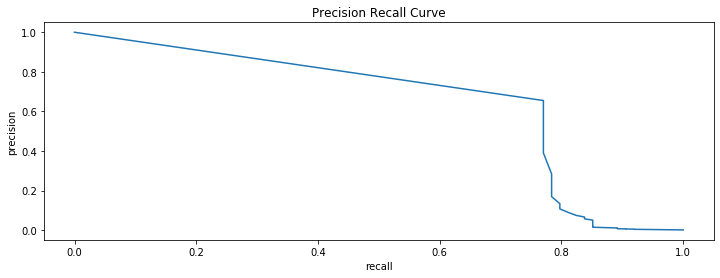

In [27]:
# Plot precision recall curve and the area under that curve.

# get precision, recall, and threshold values
p, r, th = precision_recall_curve(y_test_, probs)

# find and print AUC
print("AUC: {}".format(auc(r, p)))

# plot curve
plt.figure(figsize=(12, 4))
plt.plot(r, p)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve")
plt.show()

## Cross Validation

I will check the scores at each split of the model to make sure it is not over fitting to a specific split.

In [28]:
# print cross validation scores
customCV(model, X, y, StandardScaler(), SMOTE(), outlier_removal=False,
         pca=None, print_splits=True, threshold=threshold)

split 1
recall: 0.8182
precision: 0.757
f1: 0.7864
precision-recall auc: 0.7841
split 2
recall: 0.8182
precision: 0.802
f1: 0.81
precision-recall auc: 0.7874
split 3
recall: 0.8061
precision: 0.6475
f1: 0.7182
precision-recall auc: 0.7558
split 4
recall: 0.898
precision: 0.7333
f1: 0.8073
precision-recall auc: 0.8362
split 5
recall: 0.8571
precision: 0.7434
f1: 0.7962
precision-recall auc: 0.8103
Mean Scores:
Mean recall: 0.8395
Mean precision: 0.7366
Mean f1: 0.7836
Mean auc: 0.7947 



[0.8395176252319109,
 0.7366453385224985,
 0.7836275131038162,
 0.7947466230714545]

It appears to not be overfitting to a particular split. <br>
The Cross validated scores are %84 recall and %74 precision

## Save Data

Now I will save the data along with a string to represent the transformations done to the data

In [29]:
pickle_out = open("Models/KNN.pickle", "wb")
pickle.dump([model, 's1_r1_o1, pca None'], pickle_out)
pickle_out.close()